In [1]:
import ccxt
import numpy as np
import pandas as pd
import datetime as dt
from dateutil import tz
import matplotlib.pyplot as plt

import json
import time
import os
import sys

In [2]:
src_path = '../src/'
sys.path.append(os.path.abspath(src_path))
import func_get
import func_signal
import func_backtest

In [3]:
start_ts = time.time()

In [4]:
interval_dict = {
    '1m': 1,
    '5m': 5,
    '15m': 15,
    '30m': 30,
    '1h': 60,
    '2h': 120,
    '4h': 240,
    '1d': 1440
}

In [5]:
with open('../../../_keys/ftx/ftx_read_keys.json') as keys_file:
    keys_dict = json.load(keys_file)
    
exchange = ccxt.ftx({'apiKey': keys_dict['apiKey'],
                     'secret': keys_dict['secret'],
                     'enableRateLimit': True})

### Config

In [6]:
project_name = 'ultimate'

In [7]:
start_date = dt.datetime(2022, 1, 1)
start_hour = 0
end_date = dt.datetime.today() - dt.timedelta(days=1)
reinvest_profit_flag = True

In [8]:
config_params = {
    'safety_ohlcv_range': 1000,
    'action_timeframe': '1h',
    'target_side': ['buy', 'sell'],
    'base': {
        'symbol': ['ETH-PERP', 'SOL-PERP', 'LUNA-PERP'],
        'open': {
            '1h': {
                'supertrend': {
                    'check': ['check_signal_side_change'],
                    'look_back': 1,
                    'atr_range': 50,
                    'multiplier': 5.1,
                    'revert': False
                },
                'donchian': {
                    'check': ['check_signal_side'],
                    'look_back': 1,
                    'windows': 30,
                    'revert': False
                },
                'hull': {
                    'check': ['check_signal_side'],
                    'look_back': 1,
                    'windows': 180,
                    'revert': False
                }
            },
            '4h': {
                'supertrend': {
                    'check': ['check_signal_side'],
                    'look_back': 1,
                    'atr_range': 50,
                    'multiplier': 5.1,
                    'revert': False
                },
                'donchian': {
                    'check': ['check_signal_side'],
                    'look_back': 1,
                    'windows': 30,
                    'revert': False
                },
                'hull': {
                    'check': ['check_signal_side'],
                    'look_back': 1,
                    'windows': 180,
                    'revert': False
                }    
            }    
            
        },
        'close': {
            '1h': {
                'supertrend': {
                    'check': ['check_signal_side'],
                    'look_back': 0,
                    'atr_range': 50,
                    'multiplier': 5.1,
                    'revert': False
                } 
            }
        }
    },
    'lead': {
        'symbol': [],
        'open': {
        },
        'close': {
        }
    },
    'tp': {
        'stop_percent': 50,
        'price_percent': 5,
        'signal': None,
    },
    'sl': {
        'stop_percent': 50,
        'price_percent': None,
        'signal': {
            'timeframe': '1h',
            'signal': {
                'supertrend': {
                    'look_back': 0,
                    'atr_range': 50,
                    'multiplier': 5.1,
                    'revert': False
                }
            }
        }
    },
    'action_percent': 10,
    'leverage': 5,
    'taker_fee_percent': 0.07
}

### Get data

In [9]:
ohlcv_df_dict = func_get.get_data(exchange, start_date, end_date, start_hour, interval_dict, config_params)

base: timeframe 1/2 symbol 1/3 date 1/149
base: timeframe 1/2 symbol 1/3 date 2/149
base: timeframe 1/2 symbol 1/3 date 3/149
base: timeframe 1/2 symbol 1/3 date 4/149
base: timeframe 1/2 symbol 1/3 date 5/149
base: timeframe 1/2 symbol 1/3 date 6/149
base: timeframe 1/2 symbol 1/3 date 7/149
base: timeframe 1/2 symbol 1/3 date 8/149
base: timeframe 1/2 symbol 1/3 date 9/149
base: timeframe 1/2 symbol 1/3 date 10/149
base: timeframe 1/2 symbol 1/3 date 11/149
base: timeframe 1/2 symbol 1/3 date 12/149
base: timeframe 1/2 symbol 1/3 date 13/149
base: timeframe 1/2 symbol 1/3 date 14/149
base: timeframe 1/2 symbol 1/3 date 15/149
base: timeframe 1/2 symbol 1/3 date 16/149
base: timeframe 1/2 symbol 1/3 date 17/149
base: timeframe 1/2 symbol 1/3 date 18/149
base: timeframe 1/2 symbol 1/3 date 19/149
base: timeframe 1/2 symbol 1/3 date 20/149
base: timeframe 1/2 symbol 1/3 date 21/149
base: timeframe 1/2 symbol 1/3 date 22/149
base: timeframe 1/2 symbol 1/3 date 23/149
base: timeframe 1/2 

base: timeframe 1/2 symbol 2/3 date 42/149
base: timeframe 1/2 symbol 2/3 date 43/149
base: timeframe 1/2 symbol 2/3 date 44/149
base: timeframe 1/2 symbol 2/3 date 45/149
base: timeframe 1/2 symbol 2/3 date 46/149
base: timeframe 1/2 symbol 2/3 date 47/149
base: timeframe 1/2 symbol 2/3 date 48/149
base: timeframe 1/2 symbol 2/3 date 49/149
base: timeframe 1/2 symbol 2/3 date 50/149
base: timeframe 1/2 symbol 2/3 date 51/149
base: timeframe 1/2 symbol 2/3 date 52/149
base: timeframe 1/2 symbol 2/3 date 53/149
base: timeframe 1/2 symbol 2/3 date 54/149
base: timeframe 1/2 symbol 2/3 date 55/149
base: timeframe 1/2 symbol 2/3 date 56/149
base: timeframe 1/2 symbol 2/3 date 57/149
base: timeframe 1/2 symbol 2/3 date 58/149
base: timeframe 1/2 symbol 2/3 date 59/149
base: timeframe 1/2 symbol 2/3 date 60/149
base: timeframe 1/2 symbol 2/3 date 61/149
base: timeframe 1/2 symbol 2/3 date 62/149
base: timeframe 1/2 symbol 2/3 date 63/149
base: timeframe 1/2 symbol 2/3 date 64/149
base: timef

base: timeframe 1/2 symbol 3/3 date 84/149
base: timeframe 1/2 symbol 3/3 date 85/149
base: timeframe 1/2 symbol 3/3 date 86/149
base: timeframe 1/2 symbol 3/3 date 87/149
base: timeframe 1/2 symbol 3/3 date 88/149
base: timeframe 1/2 symbol 3/3 date 89/149
base: timeframe 1/2 symbol 3/3 date 90/149
base: timeframe 1/2 symbol 3/3 date 91/149
base: timeframe 1/2 symbol 3/3 date 92/149
base: timeframe 1/2 symbol 3/3 date 93/149
base: timeframe 1/2 symbol 3/3 date 94/149
base: timeframe 1/2 symbol 3/3 date 95/149
base: timeframe 1/2 symbol 3/3 date 96/149
base: timeframe 1/2 symbol 3/3 date 97/149
base: timeframe 1/2 symbol 3/3 date 98/149
base: timeframe 1/2 symbol 3/3 date 99/149
base: timeframe 1/2 symbol 3/3 date 100/149
base: timeframe 1/2 symbol 3/3 date 101/149
base: timeframe 1/2 symbol 3/3 date 102/149
base: timeframe 1/2 symbol 3/3 date 103/149
base: timeframe 1/2 symbol 3/3 date 104/149
base: timeframe 1/2 symbol 3/3 date 105/149
base: timeframe 1/2 symbol 3/3 date 106/149
base

base: timeframe 2/2 symbol 1/3 date 125/274
base: timeframe 2/2 symbol 1/3 date 126/274
base: timeframe 2/2 symbol 1/3 date 127/274
base: timeframe 2/2 symbol 1/3 date 128/274
base: timeframe 2/2 symbol 1/3 date 129/274
base: timeframe 2/2 symbol 1/3 date 130/274
base: timeframe 2/2 symbol 1/3 date 131/274
base: timeframe 2/2 symbol 1/3 date 132/274
base: timeframe 2/2 symbol 1/3 date 133/274
base: timeframe 2/2 symbol 1/3 date 134/274
base: timeframe 2/2 symbol 1/3 date 135/274
base: timeframe 2/2 symbol 1/3 date 136/274
base: timeframe 2/2 symbol 1/3 date 137/274
base: timeframe 2/2 symbol 1/3 date 138/274
base: timeframe 2/2 symbol 1/3 date 139/274
base: timeframe 2/2 symbol 1/3 date 140/274
base: timeframe 2/2 symbol 1/3 date 141/274
base: timeframe 2/2 symbol 1/3 date 142/274
base: timeframe 2/2 symbol 1/3 date 143/274
base: timeframe 2/2 symbol 1/3 date 144/274
base: timeframe 2/2 symbol 1/3 date 145/274
base: timeframe 2/2 symbol 1/3 date 146/274
base: timeframe 2/2 symbol 1/3 d

base: timeframe 2/2 symbol 2/3 date 40/274
base: timeframe 2/2 symbol 2/3 date 41/274
base: timeframe 2/2 symbol 2/3 date 42/274
base: timeframe 2/2 symbol 2/3 date 43/274
base: timeframe 2/2 symbol 2/3 date 44/274
base: timeframe 2/2 symbol 2/3 date 45/274
base: timeframe 2/2 symbol 2/3 date 46/274
base: timeframe 2/2 symbol 2/3 date 47/274
base: timeframe 2/2 symbol 2/3 date 48/274
base: timeframe 2/2 symbol 2/3 date 49/274
base: timeframe 2/2 symbol 2/3 date 50/274
base: timeframe 2/2 symbol 2/3 date 51/274
base: timeframe 2/2 symbol 2/3 date 52/274
base: timeframe 2/2 symbol 2/3 date 53/274
base: timeframe 2/2 symbol 2/3 date 54/274
base: timeframe 2/2 symbol 2/3 date 55/274
base: timeframe 2/2 symbol 2/3 date 56/274
base: timeframe 2/2 symbol 2/3 date 57/274
base: timeframe 2/2 symbol 2/3 date 58/274
base: timeframe 2/2 symbol 2/3 date 59/274
base: timeframe 2/2 symbol 2/3 date 60/274
base: timeframe 2/2 symbol 2/3 date 61/274
base: timeframe 2/2 symbol 2/3 date 62/274
base: timef

base: timeframe 2/2 symbol 2/3 date 229/274
base: timeframe 2/2 symbol 2/3 date 230/274
base: timeframe 2/2 symbol 2/3 date 231/274
base: timeframe 2/2 symbol 2/3 date 232/274
base: timeframe 2/2 symbol 2/3 date 233/274
base: timeframe 2/2 symbol 2/3 date 234/274
base: timeframe 2/2 symbol 2/3 date 235/274
base: timeframe 2/2 symbol 2/3 date 236/274
base: timeframe 2/2 symbol 2/3 date 237/274
base: timeframe 2/2 symbol 2/3 date 238/274
base: timeframe 2/2 symbol 2/3 date 239/274
base: timeframe 2/2 symbol 2/3 date 240/274
base: timeframe 2/2 symbol 2/3 date 241/274
base: timeframe 2/2 symbol 2/3 date 242/274
base: timeframe 2/2 symbol 2/3 date 243/274
base: timeframe 2/2 symbol 2/3 date 244/274
base: timeframe 2/2 symbol 2/3 date 245/274
base: timeframe 2/2 symbol 2/3 date 246/274
base: timeframe 2/2 symbol 2/3 date 247/274
base: timeframe 2/2 symbol 2/3 date 248/274
base: timeframe 2/2 symbol 2/3 date 249/274
base: timeframe 2/2 symbol 2/3 date 250/274
base: timeframe 2/2 symbol 2/3 d

base: timeframe 2/2 symbol 3/3 date 145/274
base: timeframe 2/2 symbol 3/3 date 146/274
base: timeframe 2/2 symbol 3/3 date 147/274
base: timeframe 2/2 symbol 3/3 date 148/274
base: timeframe 2/2 symbol 3/3 date 149/274
base: timeframe 2/2 symbol 3/3 date 150/274
base: timeframe 2/2 symbol 3/3 date 151/274
base: timeframe 2/2 symbol 3/3 date 152/274
base: timeframe 2/2 symbol 3/3 date 153/274
base: timeframe 2/2 symbol 3/3 date 154/274
base: timeframe 2/2 symbol 3/3 date 155/274
base: timeframe 2/2 symbol 3/3 date 156/274
base: timeframe 2/2 symbol 3/3 date 157/274
base: timeframe 2/2 symbol 3/3 date 158/274
base: timeframe 2/2 symbol 3/3 date 159/274
base: timeframe 2/2 symbol 3/3 date 160/274
base: timeframe 2/2 symbol 3/3 date 161/274
base: timeframe 2/2 symbol 3/3 date 162/274
base: timeframe 2/2 symbol 3/3 date 163/274
base: timeframe 2/2 symbol 3/3 date 164/274
base: timeframe 2/2 symbol 3/3 date 165/274
base: timeframe 2/2 symbol 3/3 date 166/274
base: timeframe 2/2 symbol 3/3 d

### Add signal

In [10]:
ohlcv_df_dict = func_signal.add_signal(start_date, ohlcv_df_dict, interval_dict, config_params)

base add supertrend to ETH-PERP 1h
base add donchian to ETH-PERP 1h
base add hull to ETH-PERP 1h
base add supertrend to SOL-PERP 1h
base add donchian to SOL-PERP 1h
base add hull to SOL-PERP 1h
base add supertrend to LUNA-PERP 1h
base add donchian to LUNA-PERP 1h
base add hull to LUNA-PERP 1h
base add supertrend to ETH-PERP 4h
base add donchian to ETH-PERP 4h
base add hull to ETH-PERP 4h
base add supertrend to SOL-PERP 4h
base add donchian to SOL-PERP 4h
base add hull to SOL-PERP 4h
base add supertrend to LUNA-PERP 4h
base add donchian to LUNA-PERP 4h
base add hull to LUNA-PERP 4h


### Back test

In [11]:
action_time_list = func_get.gen_action_time_list(config_params, ohlcv_df_dict)
max_open_timeframe = func_backtest.get_max_open_timeframe(config_params, interval_dict)

In [12]:
budget = 100

transaction_dict = {
    'symbol': [],
    'side': [],
    'amount': [],
    'open_time': [],
    'open_price': [],
    'close_time': [],
    'close_price': [],
    'value': [],
    'notional': [],
    'profit': [],
    'profit_percent': []
}

position_dict = {}

if reinvest_profit_flag == True:
    budget_dict = {
        'time': [],
        'budget': []
    }
    
max_drawdown = 0

In [13]:
if reinvest_profit_flag == True:
    min_budget = budget

time_count = 0

for signal_time in action_time_list:
    action_time = signal_time + dt.timedelta(minutes=interval_dict[config_params['action_timeframe']])
    
    time_count += 1
    print(f"Time {action_time}: progress {time_count}/{len(action_time_list)}")

    '''
    Close positions
    '''
    for symbol in [x for x in position_dict.keys()]:
        print(f"  {symbol}")
        budget, max_drawdown, position_dict, transaction_dict = func_backtest.close_position(symbol, signal_time, max_drawdown, config_params, budget, reinvest_profit_flag, ohlcv_df_dict, position_dict, transaction_dict, interval_dict)

    '''
    Open positions
    '''
    max_position = int(1 / (config_params['action_percent'] / 100))

    for symbol in [x for x in config_params['base']['symbol'] if x not in position_dict.keys()][:max_position]:
        print(f"  {symbol}")
        position_dict = func_backtest.open_position(symbol, signal_time, max_open_timeframe, config_params, budget, ohlcv_df_dict, position_dict, interval_dict)    
    
    '''
    Update budget
    '''
    if reinvest_profit_flag == True:
        budget_dict['time'].append(signal_time)
        budget_dict['budget'].append(budget)

        if budget < min_budget:
            min_budget = budget

    if budget <= 0:
        print(f"Out of money at {action_time}")
        break
        
'''
Clear final position
'''
opened_symbol = list(position_dict.keys())

for symbol in opened_symbol:
    print(f" Clear {symbol} position")
    
    side = position_dict[symbol]['side']
    ohlcv_df = ohlcv_df_dict['base'][config_params['action_timeframe']][symbol]
    current_ohlcv_df = ohlcv_df[ohlcv_df['time'] == signal_time].reset_index(drop=True)
    close_price = current_ohlcv_df.loc[0, 'close']
    close_percent = 100
    
    budget, position_dict, transaction_dict = func_backtest.update_close_position(symbol, side, close_price, close_percent, signal_time, config_params, budget, reinvest_profit_flag, position_dict, transaction_dict, interval_dict)

Time 2022-01-01 01:00:00: progress 1/2568
  ETH-PERP
     Not available data
  SOL-PERP
     Not available data
  LUNA-PERP
     Not available data
Time 2022-01-01 02:00:00: progress 2/2568
  ETH-PERP
     Not available data
  SOL-PERP
     Not available data
  LUNA-PERP
     Not available data
Time 2022-01-01 03:00:00: progress 3/2568
  ETH-PERP
     Not available data
  SOL-PERP
     Not available data
  LUNA-PERP
     Not available data
Time 2022-01-01 04:00:00: progress 4/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-P

     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-01 20:00:00: progress 20/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     bas

     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-02 16:00:00: progress 40/256

     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-03 07:00:00: progress 55/2568
  ETH-PERP
     base ETH-PERP check_signal_side_

     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-03 23:00:00: progress 71/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
 

     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-04 15:00:00: progress 87/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     ba

     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-05 06:00:00: progress 102

     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-05 22:00:00: progress 118/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     b

  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-06 16:00:00: progress 136/2568
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 1h: sell
     Not close
     Update sl: 3629.3853328632636
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP chec

     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-07 10:00:00: progress 154/2568
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 1h: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-07 11:00:00: progress 155/2568
  ETH-PERP
     base ETH-PE

     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-08 02:00:00: progress 170/2568
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 1h: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP chec

     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-08 22:00:00: progress 190/2568
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 1h: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_si

     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-09 14:00:00: progress 206/2568
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 1h: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUN

     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-10 04:00:00: progress 220/2568
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 1h: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_sid

     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-10 20:00:00: progress 236/2568
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 1h: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_sign

     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-11 21:00:00: progress 261/2568
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 1h: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal

     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-12 12:00:00: progress 276/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action


     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-13 06:00:00: progress 294/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action


     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-13 18:00:00: progress 306/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
 

     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-14 11:00:00: progress 323/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
 

     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-15 00:00:00: progress 336/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: s

     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-01-15 17:00:00: progress 353/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action


     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-01-16 05:00:00: progress 365/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  L

     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-01-16 21:00:00: progress 381/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: se

     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-01-17 09:00:00: progress 393/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUN

     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-01-17 23:00:00: progress 407/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_ch

     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-01-18 16:00:00: progress 424/2

     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-01-19 10:00:00: progress 442/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP che

     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-01-20 01:00:00: progress 457/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No acti

     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-01-20 17:00:00: progress 473/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No act

     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-01-21 06:00:00: progress 486/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base

     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-01-21 22:00:00: progress 502

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_si

     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-23 03:00:00: progress 531/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No ac

     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-23 16:00:00: progress 544/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No ac

     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-24 08:00:00: progress 56

     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: s

     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-25 12:00:00: progress 588/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP ch

     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-26 01:00:00: progress 601/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h:

     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-26 17:00:00: progress 617/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     ba

     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: sell
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     sell: 0.9293117199862273
     price: 56.041
     tp: 53.238949999999996
     sl: 68.2541374679225
Time 2022-01-27 10:00:00: progress 634/2568
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 1h: sell
     Not close
     Update sl: 66.72044671856406
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP c

     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-28 07:00:00: progress 655/2568
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 1h: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side d

     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-28 22:00:00: progress 670/2568
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 1h: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal

     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-29 19:00:00: progress 691/2568
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 1h: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_sid

     base LUNA-PERP check_signal_side supertrend 1h: sell
     Not close
     Update sl: 58.24054281005026
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-30 12:00:00: progress 708/2568
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 1h: sell
     Not close
  ETH-PERP
     base ETH-PERP check_sign

     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-31 06:00:00: progress 726/2568
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 1h: sell
     Not close
     Update sl: 53.468820546498634
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
    

     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-31 22:00:00: progress 742/2568
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 1h: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side s

     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-02-01 14:00:00: progress 758/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LU

     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-02-02 03:00:00: progress 771/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  

     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-02-02 19:00:00: progress 787/2568
  

     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-02-03 06:00:00: progress 798/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action


     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-03 23:00:00: progress 815/2568
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 1h: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side super

     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-04 17:00:00: progress 833/2568
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 1h: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian

     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-02-05 13:00:00: progress 853/2568
  ET

     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-06 03:00:00: progress 867/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL

     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No ac

     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-07 07:00:00: progress 895/2568
  ET

     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-07 22:00:00: progress 910/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-P

     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-08 12:00:00: progress 924/2568
  ETH

     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-09 03:00:00: progress 939/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change 

     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-09 16:00:00: progress 952/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: bu

     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-10 06:00:00: progress 966/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  S

     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-10 18:00:00: progress 978/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA

     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-11 08:00:00: progress 992/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: buy
     No action
 

     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-12 00:00:00: progress 1008/25

     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-12 19:00:00: progress 1027/2568
  ETH-PERP
     base ETH-PERP check_signal_si

     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-13 07:00:00: progress 1039/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No acti

     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-13 23:00:00: progress 1055/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP ch

     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-14 12:00:00: progress 1068/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     b

     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-15 04:00:00: progress 1084/25

     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-15 15:00:00: progress 1095/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: buy
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
   

     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-16 07:00:00: progress 1111/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  L

     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-16 19:00:00: progress 1123/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LU

     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-17 11:00:00: progress 1139/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  L

     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-17 22:00:00: progress 1150/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: sell
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
  

     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-18 16:00:00: progress 1168/2568
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     bas

     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-02-19 06:00:00: progress 1182/2568
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
     Update sl: 97.90664537748175
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h

     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-02-20 06:00:00: progress 1206/2568
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_si

     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-02-20 21:00:00: progress 1221/2568
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base L

     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-02-21 15:00:00: progress 1239/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No acti

     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-02-22 03:00:00: progress 1251/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP che

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_sid

     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-02-23 07:00:00: progress 127

     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-23 21:00:00: progress 1293/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_cha

     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-24 08:00:00: progress 1304/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No actio

     base ETH-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-25 01:00:00: progress 1321/2568
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_

     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-25 12:00:00: progress 1332/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action


     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-26 05:00:00: progress 1349/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_ch

     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-26 20:00:00: progress 1364/2568
 

     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-27 12:00:00: progress 1380/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: b

     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-27 22:00:00: progress 1390/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  L

     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-28 14:00:00: progress 1406/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No acti

     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-01 01:00:00: progress 1417/2568
  ETH-PERP
     base ETH-PERP check_signal_side_chang

     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-01 14:00:00: progress 1430/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-

     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-02 00:00:00: progress 1440/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PER

     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-02 17:00:00: progress 1457/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change 

     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-03 06:00:00: progress 1470/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-P

     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-03 21:00:00: progress 1485/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: buy
 

     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-04 09:00:00: progress 1497/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_s

     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-04 22:00:00: progress 1510/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_sign

     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-05 09:00:00: progress 1521/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  L

     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-06 01:00:00: progress 1537/2568

     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-06 13:00:00: progress 1549/2568

     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-07 02:00:00: progress 1562/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_sid

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_sid

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side

     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-09 10:00:00: progress 1618/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check

     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-09 22:00:00: progress 1630/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action

     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-10 11:00:00: progress 1643/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: se

     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-10 21:00:00: progress 1653/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: sell
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal

     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-11 13:00:00: progress 1669/2568
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
     Update sl: 87.70626071004617
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell


     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-12 04:00:00: progress 1684/2568
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
     Update sl: 86.99003940553902
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: s

     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-12 21:00:00: progress 1701/2568
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-13 11:00:00: progress 1715/2568
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PER

     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-14 03:00:00: progress 1731/2568
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
     Update sl: 85.31667011041421
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h:

     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-14 19:00:00: progress 1747/2568
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-

     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-15 13:00:00: progress 1765/2568
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h:

     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-16 03:00:00: progress 1779/2568
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: buy
     Closed by signal at 84.645
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: buy
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base S

     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-16 16:00:00: progress 1792/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: sell
     No action
 

     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-17 03:00:00: progress 1803/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: s

     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-17 18:00:00: progress 1818/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  L

     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-18 06:00:00: progress 1830/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base E

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donch

     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-19 05:00:00: progress 1853/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  L

     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-19 17:00:00: progress 1865/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LU

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4

     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-20 22:00:00: progress 1894/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: bu

     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-21 10:00:00: progress 1906/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h:

     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-21 22:00:00: progress 1918/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: bu

     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-22 09:00:00: progress 1929/2568
  

     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-22 21:00:00: progress 1941/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL

     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-23 07:00:00: progress 1951/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: buy
 

     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-23 22:00:00: progress 1966/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_chang

     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-24 10:00:00: progress 1978/2568
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP che

     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
     Update sl: 94.84571736014135
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-25 01:00:00: progress 1993/2568
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal

     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-25 10:00:00: progress 2002/2568
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
     Update sl: 96.68192323991099
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
 

  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-25 23:00:00: progress 2015/2568
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ET

     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-26 11:00:00: progress 2027/2568
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP

     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-27 04:00:00: progress 2044/2568
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side do

     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-27 19:00:00: progress 2059/2568
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_sid

     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     buy: 0.5293811755481488
     price: 95.777
     tp: 100.56585000000001
     sl: 90.56564345521078
Time 2022-03-28 13:00:00: progress 2077/2568
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
     Update sl: 102.60341411928445
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 1h: buy
     Not close
     Update sl: 91.27812858610656
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
    

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-29 06:00:00: progress 2094/2568
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-29 07:00:00: progress 2095/2568
  SOL-PERP
     base SOL-PERP check_s

     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 1h: buy
     Not close
     Update sl: 99.64872400537064
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-30 03:00:00: progress 2115/2568
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 1h: buy
     Not close
     Update sl: 100.13159352526321
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP che

     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-30 19:00:00: progress 2131/2568
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_sid

     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
     Update sl: 115.04923057311706
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-31 19:00:00: progress 2155/2568
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
     Update sl: 116.3893659616547
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP che

     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-04-01 11:00:00: progress 2171/2568
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal

     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-04-02 05:00:00: progress 2189/2568
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
     Update sl: 123.3783498394646
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     bas

     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-04-02 17:00:00: progress 2201/2568
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side do

     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-04-03 11:00:00: progress 2219/2568
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supe

     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-04-04 01:00:00: progress 2233/2568
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP che

     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-04-04 19:00:00: progress 2251/2568
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side do

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchi

     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-04-05 20:00:00: progress 2276/2568
  E

     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-04-06 05:00:00: progress 2285/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: bu

     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
  

     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-04-07 08:00:00: progress 2312/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     ba

     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-04-07 23:00:00: progress 2327/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No act

     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-04-08 10:00:00: progress 2338/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_sid

     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-09 09:00:00: progress 2361/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     N

     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-09 23:00:00: progress 2375/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertren

     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: se

     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-11 00:00:00: progress 240

     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-11 10:00:00: progress 2410

     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-12 01:00:00: progress 2425/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertre

     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: s

     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-13 03:00:00: progress 2451/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     N

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_si

     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-14 03:00:00: progress 2475/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side don

     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-15 02:00:00: progress 2498/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 

     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-15 14:00:00: progress 2510/2568
  ETH-PERP
     base ETH-PERP check_signal

     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: se

     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-16 15:00:00: progress 2535/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertren

     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-17 04:00:00: progress 2548/2568
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     

     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sel

In [14]:
end_ts = time.time()
time_process = end_ts - start_ts
print(f"Time process: {round(time_process / 60, 2)} minutes")

Time process: 4.41 minutes


### Result

In [15]:
transaction_df = pd.DataFrame(transaction_dict)
transaction_df.to_csv(f'transactions/{project_name}.csv', index=False)
transaction_df

,symbol,side,amount,open_time,open_price,close_time,close_price,value,notional,profit,profit_percent
0,ETH-PERP,sell,0.006843,2022-01-06 03:00:00,3653.2000,2022-01-06 06:00:00,3470.540000,25.000000,50.000000,1.215875,4.866907
1,ETH-PERP,sell,0.006843,2022-01-06 03:00:00,3653.2000,2022-01-12 00:00:00,3218.300000,25.000000,25.000000,2.943241,11.781212
2,LUNA-PERP,sell,0.464656,2022-01-27 09:00:00,56.0410,2022-01-28 05:00:00,53.238950,26.039779,52.079558,1.266445,4.866907
3,LUNA-PERP,sell,0.464656,2022-01-27 09:00:00,56.0410,2022-02-01 00:00:00,51.016000,26.039779,26.039779,2.300074,8.839113
4,LUNA-PERP,sell,0.569435,2022-02-03 09:00:00,47.2950,2022-02-05 00:00:00,52.899055,26.931409,53.862818,-3.231080,-12.005847
5,LUNA-PERP,sell,0.569435,2022-02-03 09:00:00,47.2950,2022-02-05 01:00:00,52.176000,26.931409,26.931409,-2.819060,-10.474886
6,SOL-PERP,sell,0.265263,2022-02-18 01:00:00,95.8250,2022-02-18 23:00:00,91.033750,25.418874,50.837748,1.236247,4.866907
7,SOL-PERP,sell,0.265263,2022-02-18 01:00:00,95.8250,2022-02-21 09:00:00,94.515000,25.418874,25.418874,0.312152,1.228893
8,SOL-PERP,sell,0.312412,2022-02-24 10:00:00,82.6025,2022-02-24 11:00:00,78.472375,25.805974,51.611947,1.255074,4.866907
9,SOL-PERP,sell,0.312412,2022-02-24 10:00:00,82.6025,2022-02-25 03:00:00,90.930000,25.805974,25.805974,-2.639557,-10.235636


In [16]:
if reinvest_profit_flag == True:
    print(f"Final budget: {round(budget, 2)}")
else:
    print("Not reinvest profit")

Final budget: 112.05


In [17]:
if reinvest_profit_flag == True:
    return_percent = (budget_dict['budget'][-1] - budget_dict['budget'][0]) / budget_dict['budget'][0] * 100
    print(f"Return: {round(return_percent, 2)}%")
else:
    print("Not reinvest profit")

Return: 12.05%


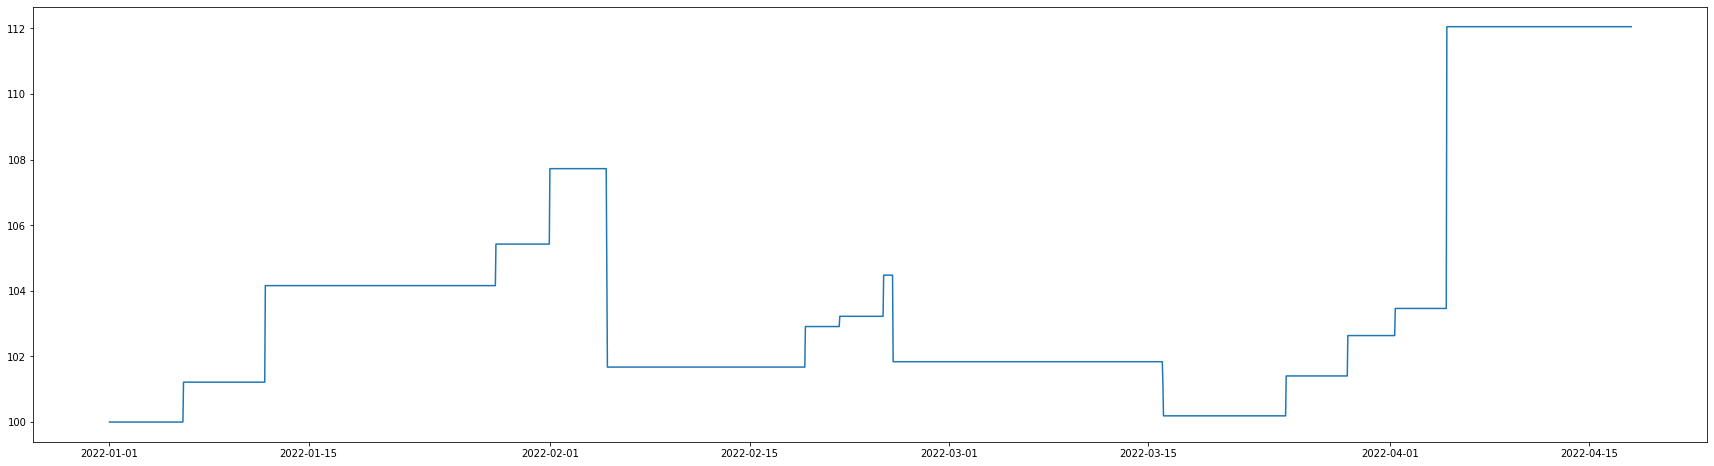

In [18]:
if reinvest_profit_flag == True:
    fig, ax = plt.subplots(figsize=(30, 8))
    ax.plot(budget_dict['time'], budget_dict['budget'])
else:
    print("Not reinvest profit")

In [19]:
if reinvest_profit_flag == True:
    print(f"Max drawdown: {round(max_drawdown * 100, 2)}%")

Max drawdown: 11.85%


In [20]:
win_rate = len(transaction_df[transaction_df['profit'] > 0]) / len(transaction_df)
print(f"Win rate: {round(win_rate * 100, 2)}%")

Win rate: 68.75%


In [21]:
for symbol in transaction_df['symbol'].unique():
    symbol_df = transaction_df[transaction_df['symbol'] == symbol]
    win_rate = len(symbol_df[symbol_df['profit'] > 0]) / len(symbol_df)
    print(f"{symbol} win rate: {round(win_rate * 100, 2)}%")

ETH-PERP win rate: 100.0%
LUNA-PERP win rate: 66.67%
SOL-PERP win rate: 62.5%


In [22]:
print(f"Distribution")
print(pd.DataFrame(transaction_df['profit_percent'].describe()))

Distribution
       profit_percent
count       16.000000
mean         3.084625
std         10.875746
min        -12.005847
25%         -2.879942
50%          4.853103
75%          4.866907
max         34.275457


In [23]:
for symbol in transaction_df['symbol'].unique():
    temp_return = transaction_df[transaction_df['symbol'] == symbol]['profit_percent']
    
    print(f"Distribution {symbol}:")
    print(pd.DataFrame(temp_return.describe()))
    print("\n")

Distribution ETH-PERP:
       profit_percent
count        2.000000
mean         8.324059
std          4.889152
min          4.866907
25%          6.595483
50%          8.324059
75%         10.052635
max         11.781212


Distribution LUNA-PERP:
       profit_percent
count        6.000000
mean        -0.110249
std          8.829364
min        -12.005847
25%         -7.041135
50%          4.056611
75%          4.863456
max          8.839113


Distribution SOL-PERP:
       profit_percent
count        8.000000
mean         4.170921
std         13.282366
min        -10.235636
25%         -2.879942
50%          3.040998
75%          4.866907
max         34.275457




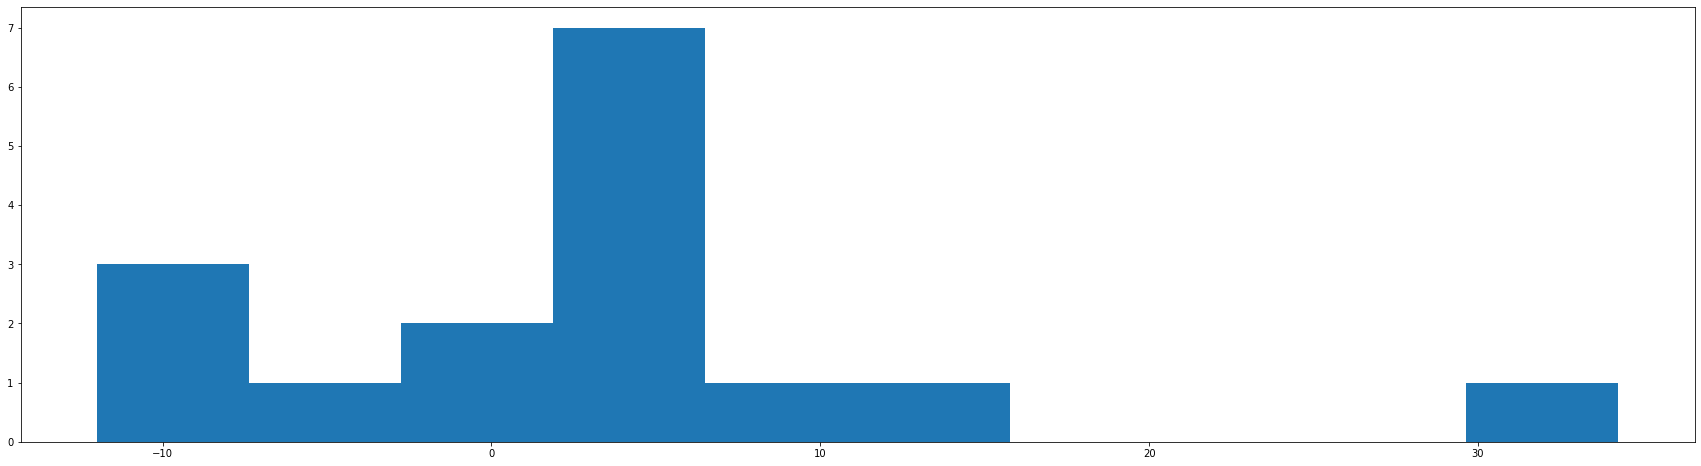

In [24]:
fig, ax = plt.subplots(figsize=(30, 8))
_ = ax.hist(transaction_df['profit_percent'], bins=10)